<a href="https://colab.research.google.com/github/HugocamposL3/Data-Science-Big-Data/blob/main/8_Aula_8_KNN_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN - K Nearest Neighbor

## Aprendizagem Supervisionada - Classificador

### fonte: https://minerandodados.com.br/machine-learning-na-pratica-knn-python/

### Dataset: https://archive.ics.uci.edu/ml/datasets/wine

classificar a qualidade de vinho tipo

Este noteook contém a implementação do KNN baseada na fonte indicada acima. <br/> Ele não é uma cópia fiel dessa fonte.


### 1 - Import das bibliotecas e Carga do CSV

In [1]:
# 1.1 - import das bibliotecas 
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 1.2 - Carregando a base de dados através do Sklearn
wine = datasets.load_wine()

In [3]:
type(wine)

sklearn.utils.Bunch

In [4]:
# 1.3 - criando o dataframe 
df = pd.DataFrame(data=wine.data,columns=wine.feature_names)

### 2 - Análise Exploratória dos Dados 

In [5]:
# 2.1 - Criando a coluna com os valores da variável target.
df['class'] = wine.target

In [6]:
# 2.2 - visualizando as primeiras instâncias de dados (os dados estão nas linhas)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [7]:
# 2.3 - visualizando as primeiras instâncias de dados (os dados estão nas colunas)
df.head().T # Para fazer a matriz transposta

,0,1,2,3,4
alcohol,14.23,13.20,13.16,14.37,13.24
malic_acid,1.71,1.78,2.36,1.95,2.59
ash,2.43,2.14,2.67,2.50,2.87
alcalinity_of_ash,15.60,11.20,18.60,16.80,21.00
magnesium,127.00,100.00,101.00,113.00,118.00
total_phenols,2.80,2.65,2.80,3.85,2.80
flavanoids,3.06,2.76,3.24,3.49,2.69
nonflavanoid_phenols,0.28,0.26,0.30,0.24,0.39
proanthocyanins,2.29,1.28,2.81,2.18,1.82
color_intensity,5.64,4.38,5.68,7.80,4.32


In [8]:
# 2.4 - conhecendo os tipos de dados do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

In [9]:
# 2.5 - Quantidade de amostrar por classe
df['class'].value_counts()

1    71
0    59
2    48
Name: class, dtype: int64

### 3 - Treinando o KNN

In [10]:
# 3.1 - Importando train_test_split
from sklearn.model_selection import train_test_split

In [11]:
# 3.2 - Separando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(df.drop('class',axis=1), df['class'], test_size=0.3,random_state=15)

In [12]:
# 3.3 - Importando o classificador KNN
from sklearn.neighbors import KNeighborsClassifier

In [13]:
# 3.4 -  Definindo o número de vizinhos
knn = KNeighborsClassifier(n_neighbors=3)

In [14]:
# 3.5 - Treinando o KNN com os dados de treino
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

### 4 - Fazendo Predições e avaliando o resultado

In [15]:
# 4.1 - fazendo predições sobre os dados de teste
resultado = knn.predict(X_test)

In [16]:
# 4.2 - imprimindo as predições
resultado

array([1, 2, 2, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 2, 1, 0, 2, 1, 2, 0,
       0, 2, 1, 0, 1, 1, 0, 2, 1, 2, 0, 1, 1, 0, 0, 1, 2, 2, 2, 1, 0, 2,
       1, 2, 1, 0, 0, 0, 0, 0, 0, 1])

In [17]:
# 4.3 - imprimindo a matriz de confusão
pd.crosstab(y_test,resultado, rownames=['Real'], colnames=['Predito'], margins=True)

Predito,0,1,2,All
Real,,,,
0,16,0,2,18
1,2,12,5,19
2,3,7,7,17
All,21,19,14,54


In [18]:
# 4.4 importando metrics
from sklearn import metrics

In [19]:
# 4.5 - imprimindo os indicadores de performance
print(metrics.classification_report(y_test,resultado,target_names=wine.target_names))

              precision    recall  f1-score   support

     class_0       0.76      0.89      0.82        18
     class_1       0.63      0.63      0.63        19
     class_2       0.50      0.41      0.45        17

    accuracy                           0.65        54
   macro avg       0.63      0.64      0.63        54
weighted avg       0.63      0.65      0.64        54



### 5 - Otimizando o parâmetro k utilizando o GridSearch

In [20]:
# 5.1 - importando GridSearchCV
from sklearn.model_selection import GridSearchCV

In [21]:
# 5.2 - Definindo a lista de valores.
k_list = list(range(1,31)) # definindo 30 k's vizinhos diferentes

In [22]:
# 5.3 - Colocandos os valores em um dicionário
parametros = dict(n_neighbors=k_list)

In [23]:
# 5.4 - Instanciando o objeto GridSearch
grid = GridSearchCV(knn, parametros, cv=5, scoring='accuracy') ## cv = cross validation 

In [24]:
# 5.5 - treinando o objeto GridSearch
grid.fit(df.drop('class',axis=1),df['class'])

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=3, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [25]:
# 5.6 - Imprimindo o melhor k e sua acurácia
print("Melhores parametros {} com o valor de acurácia {} ".format(grid.best_params_,grid.best_score_))

Melhores parametros {'n_neighbors': 1} com o valor de acurácia 0.7250793650793651 


In [26]:
# 5.7 - salvando a acurácia para os diversos valores de k
scores = grid.cv_results_['mean_test_score']

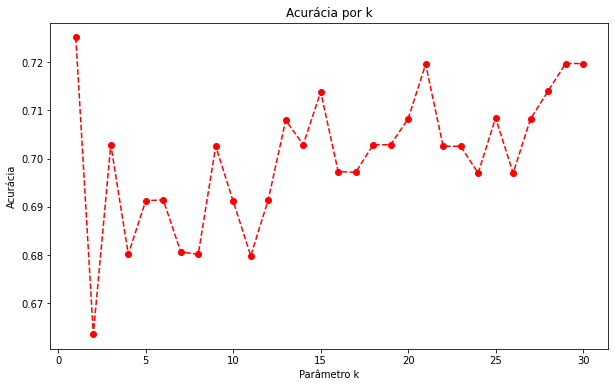

In [27]:
# Formatando o gráfico
plt.figure(figsize=(10,6))
plt.xlabel('Parâmetro k')
plt.ylabel('Acurácia')
plt.title('Acurácia por k')
# desenhando o gráfico de linha
plt.plot(k_list,scores,color='red',linestyle='dashed',marker='o')

### 6 - Visualizando a fronteira de complexidade

In [28]:
# 6.1 - import do plot_decision_regions
from mlxtend.plotting import plot_decision_regions

In [34]:
# 6.2 - import do warnings
import warnings

In [35]:
# 6.3 - ignorando matplotlib deprecation warning
warnings.filterwarnings("ignore")

In [29]:
# 6.4 - selecionando duas colunas: X será 'alcohol' e y será 'malic_acid'
X = wine.data[:,[0,2]]
y = wine.target

In [30]:
# 6.5 - criando a função que imprime as fronteiras
def plot_fronteiras(n_vizinhos):
    knn = KNeighborsClassifier(n_neighbors=n_vizinhos)
    knn.fit(X, y)
    plt.figure(figsize=(8,5))
    plot_decision_regions(X,y,clf=knn,legend=2)
    plt.xlabel('alcohol')
    plt.ylabel('malic_acid')
    plt.title('Fronteiras de Complexidade - KNN')

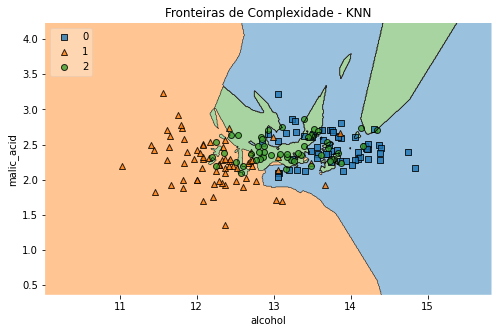

In [36]:
# 6.6 - Visualizando as fronteiras de decisão com o K=3
plot_fronteiras(3)

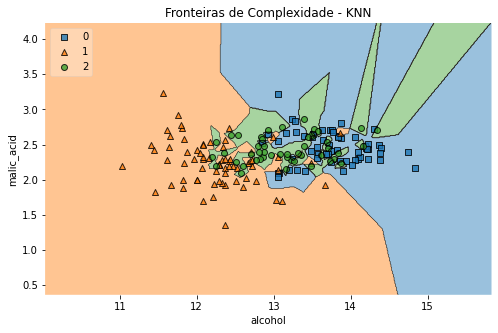

In [37]:
# 6.7 - Visualizando as fronteiras de decisão com o K=1
plot_fronteiras(1)

# Atividade

Implementar o método de classificação KNN da seguinte fonte:

http://www.sakurai.dev.br/classificacao-usando-knn/